WQD7009: Course Assignment <br >
Part 1: Section (a) <br >
Market Basket Analysis Code

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Change working directory to script location
os.chdir(sys.path[0])

1. Data Analysis and Exploration

In [2]:
df = pd.read_csv('Market_Basket_Data.csv', index_col=False,header=None)

# Have an overview of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [3]:
# Print first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


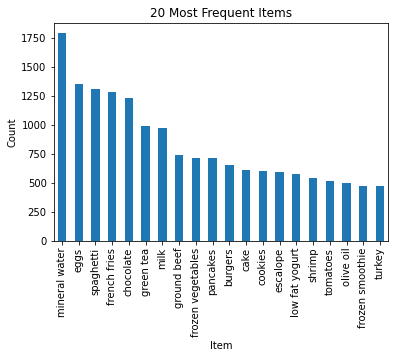

In [4]:
# Plot 20 Most Frequent Items
df.stack().value_counts().nlargest(20).plot.bar(stacked=True)
plt.title('20 Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()

In [5]:
# Find unique items, skip if NaN
unique_items = set()
for item in df:
    unique_items.update(df[item].dropna().unique())

# Show how many unique items
len(unique_items)

120

2. Data Clean and Preprocess

In [6]:
# Data cleaning

# Filter out NaN value
df = df.apply(lambda x: ','.join(x.dropna()), axis=1)

# Transform dataset to a suitable format for the encoder
df = df.apply(lambda row: row.split(','))

# Show first five rows
df.head()

0    [shrimp, almonds, avocado, vegetables mix, gre...
1                           [burgers, meatballs, eggs]
2                                            [chutney]
3                                    [turkey, avocado]
4    [mineral water, milk, energy bar, whole wheat ...
dtype: object

In [7]:
# Data preprocessing - One Hot Encode
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

# Show first five row of encoded df
encoded_df.head(10)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. A-Priori 

In [8]:
# Generate frequent itemsets that have a support of at least 1%
freq_itemsets = apriori(df=encoded_df, min_support=0.01, use_colnames=True, verbose=1)

# Show how many frequent itemsets
len(freq_itemsets)

Processing 84 combinations | Sampling itemset size 4 3


257

In [9]:
# Show random rows of frequent itemsets
freq_itemsets.sample(n=20)

,support,itemsets
113,0.010932,"(grated cheese, chocolate)"
167,0.010532,"(french fries, whole wheat rice)"
16,0.051060,(cooking oil)
17,0.031862,(cottage cheese)
115,0.023064,"(ground beef, chocolate)"
46,0.238368,(mineral water)
123,0.010132,"(chocolate, soup)"
145,0.011998,"(olive oil, eggs)"
57,0.018531,(protein bar)
41,0.076523,(low fat yogurt)


In [10]:
# Extract association rules
rules = association_rules(df=freq_itemsets, metric="confidence", min_threshold=0.5)

# Sort Show the association rules
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552


Refences <br>
https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c <br>
https://pbpython.com/market-basket-analysis.html <br>
https://highontechs.com/recommendation-system/apriori-algorithm-implementation-in-python/